In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [282]:
df = pd.read_csv("Car_sales.csv")

In [283]:
df.sample(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
107,Nissan,Frontier,65.005,NaN,Car,17.890,3.3,170.0,116.1,66.5,196.1,3.217,19.4,18.0,8/27/2011,67.889271
75,Lexus,RX300,51.238,NaN,Car,34.605,3.0,220.0,103.0,71.5,180.1,3.900,17.2,21.0,1/4/2012,91.943802
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
135,Subaru,Forester,33.028,NaN,Car,20.095,2.5,165.0,99.4,68.3,175.2,3.125,15.9,24.0,9/10/2012,66.762943
142,Toyota,RAV4,25.106,13.325,Car,16.888,2.0,127.0,94.9,66.7,163.8,2.668,15.3,27.0,5/6/2011,51.955109


In [284]:
df.shape

(157, 16)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [286]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [287]:
df.isnull().sum() #checking for missing values

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [288]:
df['Vehicle_type'].value_counts()

Passenger    116
Car           41
Name: Vehicle_type, dtype: int64

In [289]:
df.drop(["Vehicle_type", "Latest_Launch"], axis = 1, inplace=True) #remove irrelavent columns
df.sample(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
138,Toyota,Avalon,63.849,18.140,25.545,3.0,210.0,107.1,71.7,191.9,3.417,18.5,26.0,84.911898
123,Pontiac,Montana,39.572,NaN,25.635,3.4,185.0,120.0,72.7,201.3,3.942,25.0,23.0,76.208440
71,Lexus,GS300,12.698,32.075,37.805,3.0,225.0,110.2,70.9,189.2,3.638,19.8,23.0,94.946698
7,BMW,323i,19.747,NaN,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,71.191207
131,Saturn,SW,5.223,10.790,14.290,1.9,124.0,102.4,66.4,176.9,2.452,12.1,31.0,49.865774


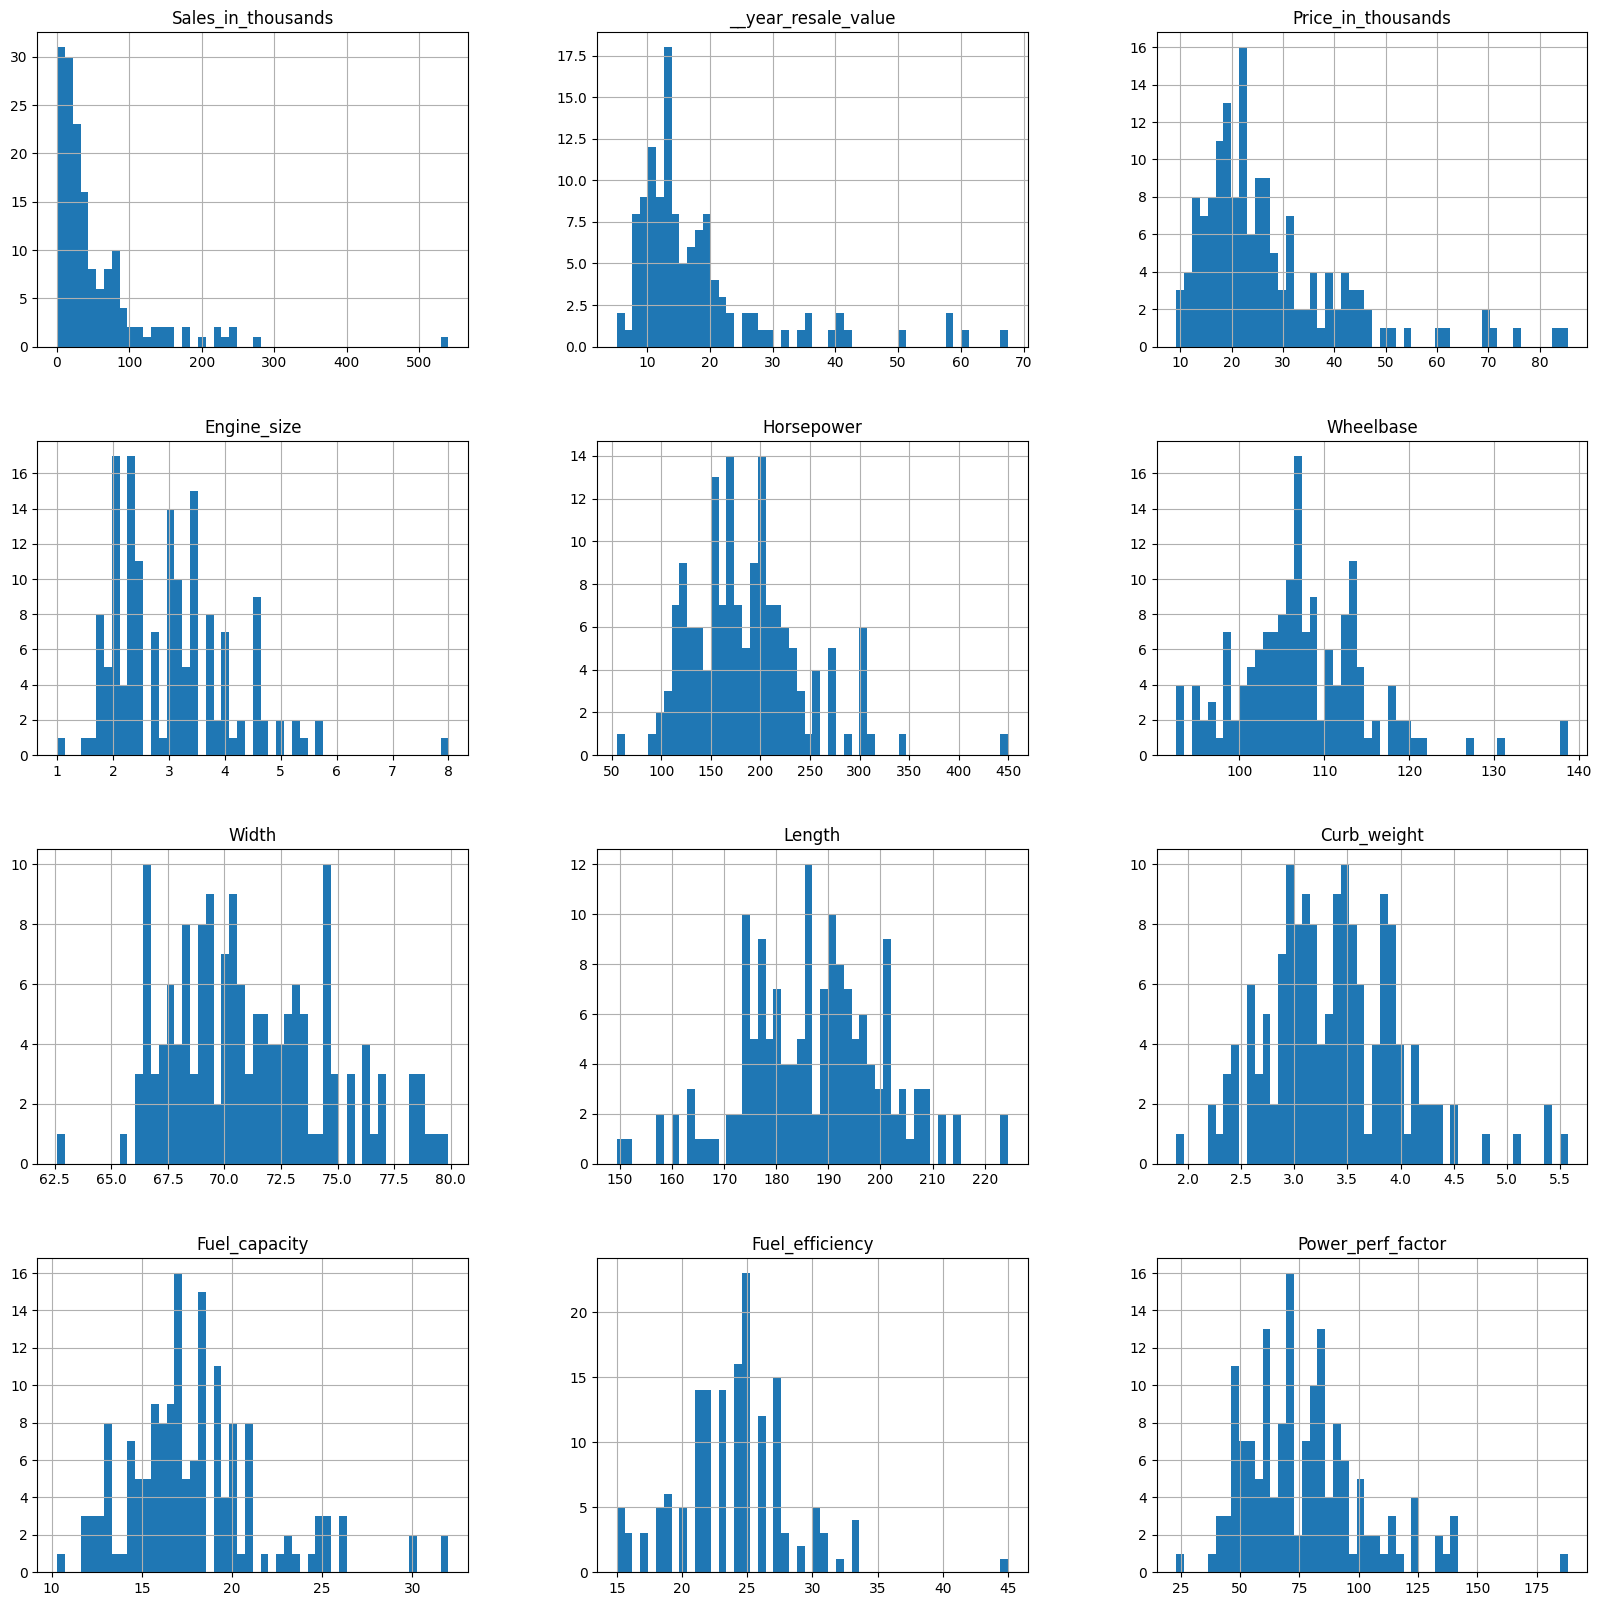

In [290]:
df.hist(bins = 50,figsize = (20,20))
plt.show()

In [291]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["Price_in_thousands"].sort_values(ascending=False)

Price_in_thousands     1.000000
__year_resale_value    0.953840
Power_perf_factor      0.897945
Horsepower             0.839744
Engine_size            0.626875
Curb_weight            0.526224
Fuel_capacity          0.423282
Width                  0.329136
Length                 0.156935
Wheelbase              0.110513
Sales_in_thousands    -0.304734
Fuel_efficiency       -0.492157
Name: Price_in_thousands, dtype: float64

<Axes: xlabel='Power_perf_factor', ylabel='Price_in_thousands'>

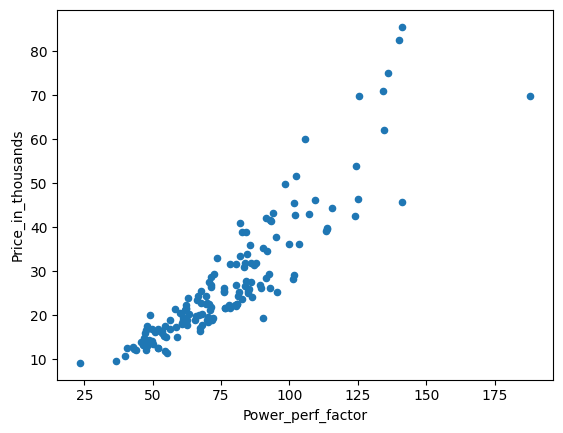

In [292]:
df.plot(kind="scatter", x="Power_perf_factor", y="Price_in_thousands")

<Axes: xlabel='Fuel_efficiency', ylabel='Price_in_thousands'>

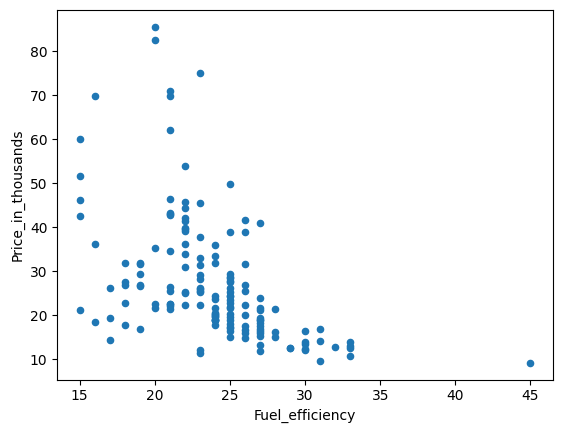

In [293]:
df.plot(kind="scatter", x="Fuel_efficiency", y="Price_in_thousands")

<Axes: >

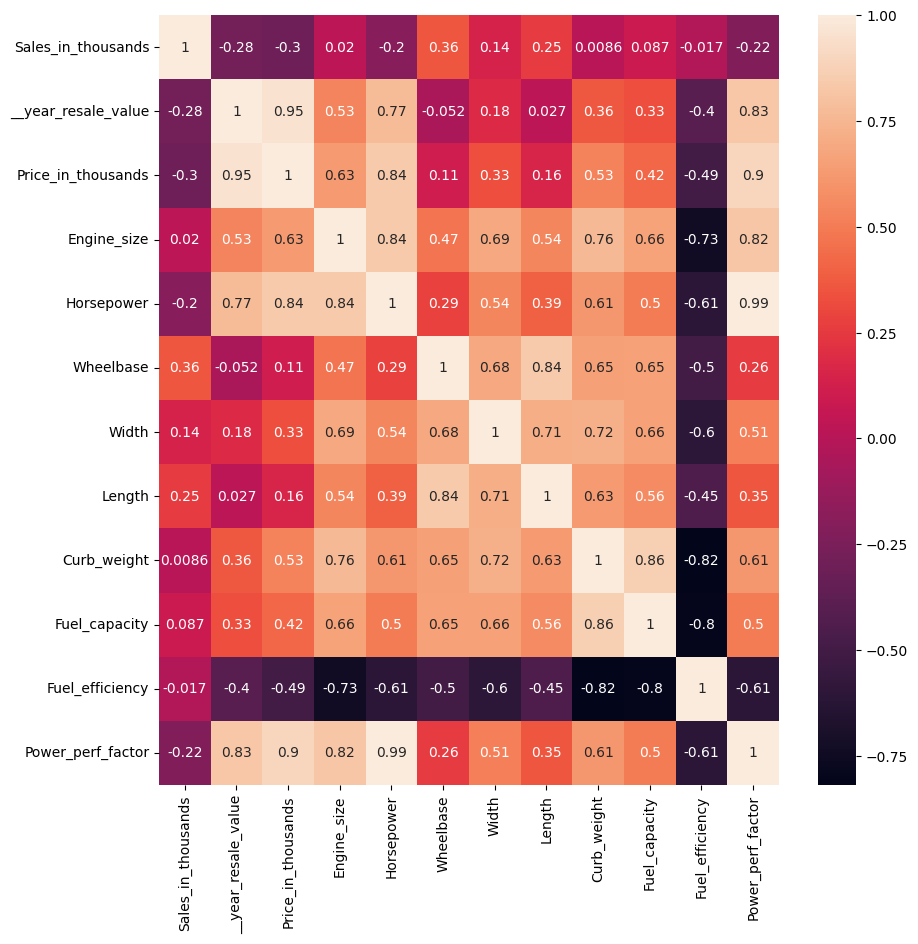

In [294]:
plt.figure(figsize=(10,10))       #correlation matrix
sns.heatmap(corr_matrix, annot=True)

In [295]:
X_ind = df.drop("Price_in_thousands", axis=1)    #dividing independent and dependent variables
y = df['Price_in_thousands']

In [296]:
print(X_ind.shape,y.shape)

(157, 13) (157,)


In [297]:
df_num = X_ind.drop(["Manufacturer", "Model"], axis = 1) #numerical features

In [298]:
imputer = SimpleImputer(strategy="median")    #missing value imputation by median
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [299]:
X = imputer.transform(df_num)
X

array([[ 16.919     ,  16.36      ,   1.8       , ...,  13.2       ,
         28.        ,  58.28014952],
       [ 39.384     ,  19.875     ,   3.2       , ...,  17.2       ,
         25.        ,  91.37077766],
       [ 14.114     ,  18.225     ,   3.2       , ...,  17.2       ,
         26.        ,  72.03091719],
       ...,
       [ 17.531     ,  14.18      ,   2.4       , ...,  17.9       ,
         25.        ,  71.1559776 ],
       [  3.493     ,  14.18      ,   2.3       , ...,  18.5       ,
         23.        , 101.6233572 ],
       [ 18.969     ,  14.18      ,   2.9       , ...,  21.1       ,
         24.        ,  85.73565451]])

In [300]:
df_trans = pd.DataFrame(X, columns = df_num.columns, index = df_num.index)


In [301]:
df_trans.isnull().sum()

Sales_in_thousands     0
__year_resale_value    0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Power_perf_factor      0
dtype: int64

In [302]:
from sklearn.preprocessing import StandardScaler      #scaling the features
def standard_scale(data):
    scaler = StandardScaler()
    data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    return data_scaled

standard_scaled_df = standard_scale(df_trans)

In [303]:
df_cat = df[["Manufacturer", "Model"]]         #categorical features
df_cat

,Manufacturer,Model
0,Acura,Integra
1,Acura,TL
2,Acura,CL
3,Acura,RL
4,Audi,A4
...,...,...
152,Volvo,V40
153,Volvo,S70
154,Volvo,V70
155,Volvo,C70


In [304]:
df = pd.concat([standard_scaled_df,df_cat], axis = 1)

In [305]:
df.isnull().sum()

Sales_in_thousands     0
__year_resale_value    0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Power_perf_factor      0
Manufacturer           0
Model                  0
dtype: int64

In [306]:
def one_hot_encode(data, columns_to_encode):           #encode categorical features
    data_encoded = pd.get_dummies(data, columns=columns_to_encode)
    return data_encoded

categorical_columns = ['Manufacturer', 'Model']
df_final = one_hot_encode(df, columns_to_encode=categorical_columns)

In [307]:
df_final

,Sales_in_thousands,__year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,Model_Town & Country,Model_Town car,Model_V40,Model_V70,Model_Villager,Model_Viper,Model_Voyager,Model_Windstar,Model_Wrangler,Model_Xterra
0,-0.532042,-0.080851,-1.214376,-0.814577,-0.827661,-1.121287,-1.119971,-1.182726,-1.228700,0.982264,...,0,0,0,0,0,0,0,0,0,0
1,-0.200761,0.265588,0.134385,0.694066,0.081122,-0.246689,0.416070,0.223285,-0.193381,0.272684,...,0,0,0,0,0,0,0,0,0,0
2,-0.573406,0.102964,0.134385,0.694066,-0.076927,-0.159229,0.348634,0.148020,-0.193381,0.509211,...,0,0,0,0,0,0,0,0,0,0
3,-0.654896,1.236405,0.423406,0.427835,0.937221,0.073997,0.693306,0.756545,0.013683,-0.436897,...,0,0,0,0,0,0,0,0,0,0
4,-0.480754,0.500161,-1.214376,-0.637089,-0.643270,-0.858907,-0.700370,-0.607830,-0.400444,0.745737,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,-0.729263,-0.295712,-1.118036,-0.459602,-0.919856,-1.033827,-0.805270,-0.537370,-0.555742,0.272684,...,0,0,1,0,0,0,0,0,0,0
153,-0.556728,-0.295712,-0.636336,-0.317612,-0.340343,-0.538221,-0.108432,-0.271541,-0.012200,0.272684,...,0,0,0,0,0,0,0,0,0,0
154,-0.523017,-0.295712,-0.636336,-0.317612,-0.340343,-0.538221,-0.085953,-0.189871,-0.012200,0.272684,...,0,0,0,1,0,0,0,0,0,0
155,-0.730030,-0.295712,-0.732676,0.889302,-0.340343,0.103151,-0.123418,0.357801,0.143098,-0.200370,...,0,0,0,0,0,0,0,0,0,0


In [308]:
df_final.shape

(157, 197)

In [309]:
y.isnull().sum()

2

In [310]:
y.fillna(y.median(), inplace=True)

In [311]:
y.isnull().sum()

0

In [312]:
y.shape

(157,)

In [313]:
from sklearn.model_selection import train_test_split

In [314]:
X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size=0.2, random_state=42)    #splitting the data into train and test

In [315]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((125, 197), (125,), (32, 197), (32,))

In [316]:
from sklearn.linear_model import LinearRegression

In [317]:
lin_reg = LinearRegression()      #fitting linear regression
lin_reg.fit(X_train, y_train)

LinearRegression()

In [318]:
lin_prediction = lin_reg.predict(X_test)
print(lin_prediction)

[62.85146145 18.24793357 16.62753958 29.34002023 35.98914777 20.82543475
 71.6071672  39.96796982 62.14112063 19.16137974 10.06080601 24.49461061
 41.08099386 26.55284985 50.30172364 22.92782808 60.02510259 17.63095791
 40.51041762 32.35058088 19.65508487 44.11003763 29.04809517 35.7662279
 14.53145844 16.58768302 25.4382413  28.81010544 16.4882221  41.80620817
 17.0456911  37.32007442]


In [319]:
from sklearn.metrics import mean_squared_error

In [320]:
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_prediction))

print("Error is:", lin_rmse)

Error is: 4.414152542852769


In [321]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, lin_prediction)

print(f'R-squared (R2) Value: {r2}')


R-squared (R2) Value: 0.9432971833980741
